# Loan Risk Prediction

### Objective
The goal this project is to predict the likelihood of loan repayment for every loan using the datasets given. I will be focusing on Data Exploration, Data Preparation, Exploratory Data Analysis(EDA), feature engineering and lastly, creating a sensible model.  

### Structure

Data Cleaning and Preparation:

- I will start by examining the datasets for accuracy, handling missing values, and ensuring the data is ready for analysis. This will include exploratory data analysis (EDA).

  
Feature Engineering:

- Based on the findings from the EDA, I will define the target label for predicting loan risk. This process will involve creating meaningful new features that reflect historical payment behavior and other relevant factors.


Model Development and Evaluation:

- I will utilize Machine Learning Algorithms like Decision Tree and K-Nearest Neighbour to predict loan risk. The performance of each model will be evaluated using appropriate metrics.


Conclusion and Future Work:

- I will conclude with suggestions for further enhancements to the model and also limitations of the project.

## Import Relevant Libraries

In [2634]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2635]:
# Load the loan.csv data
loan_df = pd.read_csv('data/loan.csv')

# Load the payment.csv data
payment_df = pd.read_csv('data/payment.csv')

# Load the clarity_underwriting_variables.csv data
clarity_df = pd.read_csv('data/clarity_underwriting_variables.csv', low_memory=False)

In [2636]:
# For easier use
loan_data = loan_df
payment_data = payment_df
clarity_data = clarity_df

In [2637]:
# Preview the loan data
loan_data.head(5)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [2638]:
# Preview the payment data
payment_data.head(5)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [2639]:
# Preview the clarity underwriting data
clarity_data.head(5)

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


Now that I’ve seen the columns in all three datasets, I’ll check the data dictionary to understand what each column means and figure out which ones are most likely important for my analysis.

### My Thought Process

As I explored the data dictionary, I encountered a lot of loan-related terms that were new to me, like "underwriting." I took some time to really understand these terms, which gave me a clearer idea of how to work with the data.

One of the questions that came to mind was: if a loan has `hasCF == 1` (Has Clarity Fraud Data), does that mean I should rely only on the Clarity csv to assess the loan’s risk? At first, I thought this might be true. But after looking deeper, I realized that while Clarity data is useful for fraud detection, it doesn’t imply the loan risk of an applicant as someone who is suspected to be in fraudalant activities might still repay their loan on time.

At this point, I started to flag which columns are likely to be the most important for assessing loan risk and which might be less relevant. I also noticed that some of the column names in the Clarity dataset could be renamed to make them easier to understand.

## 1. Data Cleaning Process


In [2643]:
# Handle Missing values

# Check for missing values in each dataset
print("\nLoan data:")
print(loan_data.isnull().sum())

print("\nPayment data:")
print(payment_data.isnull().sum())

print("\nClarity data:")
print(clarity_data.isnull().sum())


Loan data:
loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

Payment data:
loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fee

## Investigating missing rows from each dataset

#### 1. loanID


In [2646]:
# 1. Investigate missing loanId rows from loan_data
missing_loanId = loan_data[loan_data['loanId'].isnull()]
print(missing_loanId)

       loanId                          anon_ssn payFrequency  apr  \
1668      NaN  8f53d4e3d17fb490a16468f940992475            B  NaN   
4749      NaN  ca89dd7de41d72d531311479cd9d166d            B  NaN   
5970      NaN  5d5adaa9cabb297235b0223c6e7182fc            B  NaN   
16229     NaN  8e44524a86abe0db1f5c0f6afc9bbd7c            B  NaN   
20193     NaN  213ad4d617b56bee5483f79837bcb6e6            B  NaN   
...       ...                               ...          ...  ...   
560056    NaN  af137379ffc63ac88dabe54f82a28343            M  NaN   
564530    NaN  d115b3e074a3f9d2a8eadb36ab2529d7            B  NaN   
564540    NaN  026abdf09af1e5a89175755e0ffa29d8            B  NaN   
566384    NaN  7cc6cc1697c748f1196e210afb4fb683            W  NaN   
571552    NaN  8d0c18f0e5afe909d10d69d022810782            B  NaN   

                   applicationDate  originated originatedDate  nPaidOff  \
1668    2015-06-23T13:29:21.667000       False            NaN       0.0   
4749    2016-01-07T06

##### Upon inspection, rows with missing loandID have mostly incomplete information on other key rows too like loan status and loan amount, therefore it is safe to drop


In [2648]:
# Drop rows with missing loanId
loan_data = loan_data.dropna(subset=['loanId'])

#### 2. payFrequency

In [2650]:
# Check the total number of rows and how many rows have missing payFrequency
total_rows = loan_data.shape[0]
missing_payFrequency_count = loan_data['payFrequency'].isnull().sum()

print(missing_payFrequency_count, total_rows)

1270 577426


Since the number of missing rows is relatively small to the number of total rows ((1,270 out of 577,426) we can safely impute the rows with the mode which is 'B'

In [2652]:
# Impute missing payFrequency with the most frequent value (mode)
mode_payFrequency = loan_data['payFrequency'].mode()[0]
loan_data.loc[:, 'payFrequency'] = loan_data['payFrequency'].fillna(mode_payFrequency)

#### 3. APR

In [2654]:
# Print number of missing apr values
print(f"Missing APR: {loan_data['apr'].isnull().sum()}")
median_apr = loan_data['apr'].median()

# Impute apr with median
loan_data.loc[:, 'apr'] = loan_data['apr'].fillna(median_apr)

Missing APR: 3666


Impute the value with median since the number of missing rows for apr is relatively small compared to the total number of rows. By imputing with median, we can still maintain the overall distribution of the data.

#### 4. originatedDate

In [2657]:
# Print number of missing apr values
print(f"Missing originatedDate: {loan_data['originatedDate'].isnull().sum()}")

# Drop originated
loan_data = loan_data.drop(columns=['originatedDate']) 

Missing originatedDate: 531382



Since there are too many values missing in the column (531,638 out of 577,426 rows), the column is unreliable, thus we drop the column


#### 5. nPaidOff

In [2660]:
# Print number of missing nPaidOff values 
print(f"Missing nPaidOff values: {loan_data['nPaidOff'].isnull().sum()}")

# Impute missing nPaidOff with the median value
median_nPaidOff = loan_data['nPaidOff'].median()
loan_data.loc[:, 'nPaidOff'] = loan_data['nPaidOff'].fillna(median_nPaidOff)

Missing nPaidOff values: 24


#### 6. loan Status

In [2662]:
# Investigate missing loanStatus rows
missing_loanStatus = loan_data[loan_data['loanStatus'].isnull()]
print(missing_loanStatus)

               loanId                          anon_ssn payFrequency    apr  \
2354    LL-I-12186108  7170f216f7f6397253afd3d835e7290e            W  590.0   
6589    LL-I-13218554  aef98a90f1639556c5d96b62842c034f            B  645.0   
8613    LL-I-13217765  8d370e00ee7a88f009712add3086b78e            B  590.0   
13497   LL-I-12183734  8410f0682d6c3e7cea379ec9cabacd11            W  590.0   
21560   LL-I-13221675  08618bc3e8ada436923294b3ef37ee4e            B  645.0   
...               ...                               ...          ...    ...   
553108  LL-I-12674203  73a6324f7edd6750695df4c1c0d7ecba            B  590.0   
556384  LL-I-14857733  6a6bed63a67e86b1100636a5b30bd86f            B  590.0   
560530  LL-I-13221171  3a78065c56ef787397ac29ae941a4b3d            B  645.0   
562950  LL-I-13230599  b6d6a3672301dd861ed83c45a0e9e53d            B  645.0   
576567  LL-I-13219504  d732e89f7779c6a184f948ac4503b0ff            B  645.0   

                   applicationDate  originated  nPa

I notice that for rows where loanStatus is Null, fpStatus is also Null. 

In [2664]:
# Investigate fpStatus for rows where loanStatus is missing
missing_loanStatus_fpStatus = loan_data[loan_data['loanStatus'].isnull()]
print(missing_loanStatus_fpStatus['fpStatus'].value_counts())

# Drop rows with missing loanStatus
loan_data = loan_data.dropna(subset=['loanStatus'])

Series([], Name: count, dtype: int64)


After investigating, we found that rows with missing loanStatus are incomplete and unreliable. There was no connection to any of the other columns, and fpStatus was also empty where loanStatus was missing. Therefore, we will drop these rows with missing loanStatus as they are not helpful for predicting loan risk.

#### 7. loanAmount

In [2667]:
# Investigate missing loanAmount rows
null_loanAmount = loan_data[loan_data['loanAmount'].isnull()]
print(null_loanAmount)

# Upon investigation, mising loan amount usually is usually due to applicants withdrawing their loan, therefore it can safely be dropped.
loan_data = loan_data.dropna(subset=['loanAmount'])

               loanId                          anon_ssn payFrequency    apr  \
136     LL-I-09584243  ffecddf04ba321d5cc545f252c3be2e1            B  590.0   
280     LL-I-07917038  4bd3bb45e34c1c6d1dde8979425db2e4            B  590.0   
334     LL-I-06502534  0079d6e4dafaf229cf87cf6d736cdd40            W  590.0   
633     LL-I-05780879  c9b80d8aba176fd4301f1d835e3ae71e            B  590.0   
767     LL-I-12644912  2011b7e6ea08987d33fa4b033251e6ef            W  590.0   
...               ...                               ...          ...    ...   
575990  LL-I-05483198  4ec91cec26d211035500ab7fa0ffcf52            B  590.0   
576342  LL-I-18580433  bfd56e031c07d1985ca750b445af65bb            W  590.0   
576608  LL-I-18570987  b5bb9d00331bc6ca200e6a458422dafd            B  590.0   
576750  LL-I-05336225  0e167ef89a18b18d8c9d89551ef000b4            B  590.0   
577306  LL-I-05955040  41db5f95c3d05aef05649d7c3d836a5c            B  590.0   

                   applicationDate  originated  nPa

Upon investigation, mising loan amount usually is usually due to applicants withdrawing their loan, therefore it can safely be dropped.

#### 8. state


In [2670]:
# Remove state column
loan_data = loan_data.drop(columns=['state'])

The state column is removed as it is not directly relevant to loan risk

#### 9. fpStatus


In [2673]:
# Investigate missing fpStatus rows
missing_fpStatus = loan_data[loan_data['fpStatus'].isnull()]
print(missing_fpStatus)

               loanId                          anon_ssn payFrequency    apr  \
0       LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
2       LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3       LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4       LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
5       LL-I-09734486  b5541f49472fa0fce8e473306768f7fb            M  650.0   
...               ...                               ...          ...    ...   
577677  LL-I-12122269  801262d04720d32040612759857f4147            B  590.0   
577678  LL-I-16183462  e37750de9d99a67e0fa96a51e86fdf5b            S  490.0   
577679  LL-I-06962710  d7e55e85266208ac4c353f42ebcde5ca            B  590.0   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.0   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.0   

                   applicationDate  originated  nPa


#### Thought Process

Initially, I considered removing the rows where fpStatus indicated that the loan wasn't approved, thinking it would allow me to focus solely on assessing the repayment risk of approved loans. However, after reflecting on this approach, I realized that it might not be the approach as Rejected loans can actually provide valuable insights.

By understanding the reasons behind loan rejections, we can be hopeful to find patterns or behaviors that contribute to loan rejections. 
Therefore I’ve decided to keep the rejected loans in the dataset.


In [2675]:
# Since fpStatus is most likely linked to loan status, I decided to dive deeper into the rows to see what they correspond to
missing_fpStatus_status_counts = missing_fpStatus['loanStatus'].value_counts()
print(missing_fpStatus_status_counts)

loanStatus
Withdrawn Application        439029
Rejected                      84533
CSR Voided New Loan            1025
Credit Return Void              704
Customer Voided New Loan        504
External Collection               8
Pending Application Fee           5
Pending Rescind                   4
Pending Application               4
Internal Collection               3
Voided New Loan                   2
Charged Off Paid Off              1
Customver Voided New Loan         1
New Loan                          1
Name: count, dtype: int64


Upon inspection, I found out that most of missing values in fpStatus are due to application being with drawn or rejected.

Decision Made:
I have decided to drop rows with withdrawn application as it would not be useful for our project to assess loan risk. Also, rows that are pending will be imputed with 'Pending'.
For other categories, I will impute the missing values with 'Not Applicable' since their loans did not go through.

##### Handling missing values in fpStatus:

In [2678]:
# drop rows where loanStatus is 'Withdrawn Applicatin'
loan_data = loan_data[loan_data['loanStatus'] != 'Withdrawn Application']

# I notice that there is a spelling mistake in one of the loan status and must be corrected since theres only 1 row in the column.
loan_data['loanStatus'] = loan_data['loanStatus'].replace('Customver Voided New Loan', 'Customer Voided New Loan')

# impute 'Not Applicable' to other missing values
loan_data.loc[loan_data['loanStatus'].isin([
    'Rejected', 'CSR Voided New Loan', 'Customer Voided New Loan', 'Credit Return Void', 'Voided New Loan',
    'External Collection', 'Internal Collection', 'New Loan', 'Charged Off Paid Off']), 
    'fpStatus'] = 'Not Applicable'

# impute 'Pending' applications 
loan_data['loanStatus'] = loan_data['loanStatus'].replace({
    'Pending Application Fee': 'Pending',
    'Pending Application': 'Pending',
    'Pending Rescind': 'Pending',
})
loan_data.loc[loan_data['loanStatus'] == 'Pending', 'fpStatus'] = 'Pending'


# check remaining missing values for fpStatus
missing_fpStatus_after = loan_data['fpStatus'].isnull().sum()
print(missing_fpStatus_after)

0


#### 10. clarityFraudId


In [2680]:
# Impute missing clarityFraudId with 'Not Applicable'
loan_data['clarityFraudId'] = loan_data['clarityFraudId'].fillna('Not Applicable')

I decided to impute missing clarityFraudId with 'Not Applicable' as not all loans will have a clarityFraudId

#### 11. paymentStatus in payment.csv


In [2683]:
# Investigate missing paymentStatus rows
missing_paymentStatus = payment_data[payment_data['paymentStatus'].isnull()]
print(missing_paymentStatus)

# Find number of missing values 
missing_paymentStatus = payment_data[payment_data['paymentStatus'].isnull()]
print(f"Missing paymentStatus: {missing_paymentStatus.shape[0]}")

               loanId  installmentIndex  isCollection          paymentDate  \
18      LL-I-00000231                 6         False  2015-02-06T05:00:00   
20      LL-I-00000231                 8         False  2015-02-20T05:00:00   
22      LL-I-00000231                10         False  2015-03-06T05:00:00   
24      LL-I-00000231                12         False  2015-03-20T04:00:00   
26      LL-I-00000231                14         False  2015-04-03T04:00:00   
...               ...               ...           ...                  ...   
689359  LL-I-18629478                 8         False  2017-07-14T04:00:00   
689360  LL-I-18629478                 9         False  2017-07-31T04:00:00   
689361  LL-I-18629478                10         False  2017-08-15T04:00:00   
689362  LL-I-18629478                11         False  2017-08-31T04:00:00   
689363  LL-I-18629478                12         False  2017-09-15T04:00:00   

        principal    fees  paymentAmount paymentStatus paymentR

In [2684]:
print(missing_paymentStatus.head())

           loanId  installmentIndex  isCollection          paymentDate  \
18  LL-I-00000231                 6         False  2015-02-06T05:00:00   
20  LL-I-00000231                 8         False  2015-02-20T05:00:00   
22  LL-I-00000231                10         False  2015-03-06T05:00:00   
24  LL-I-00000231                12         False  2015-03-20T04:00:00   
26  LL-I-00000231                14         False  2015-04-03T04:00:00   

    principal    fees  paymentAmount paymentStatus paymentReturnCode  
18      45.15  129.33         174.48           NaN               NaN  
20      53.47  121.01         174.48           NaN               NaN  
22      63.31  111.17         174.48           NaN               NaN  
24      74.96   99.52         174.48           NaN               NaN  
26      88.77   85.71         174.48           NaN               NaN  


I notice that if paymentyStatus is NaN, then paymentReturnCode, investigate to see if this is the case for every paymentStatus is NaN


In [2686]:
# Check if paymentReturnCode is NaN for every row where paymentStatus is NaN
paymentStatus_nan = payment_data[payment_data['paymentStatus'].isnull() & payment_data['paymentReturnCode'].notnull()]
print (paymentStatus_nan)

Empty DataFrame
Columns: [loanId, installmentIndex, isCollection, paymentDate, principal, fees, paymentAmount, paymentStatus, paymentReturnCode]
Index: []


My suspicion is correct, for every Null paymentStatus, the paymentReturnCode will aso be Null.

After some thinking and researching, we can conclude that this is the case for where payments that were never made, therefore we can safely drop this rows since it does not contribute to our aim of predicting loan risk.

In [2688]:
# Drop rows where both paymentStatus and paymentReturnCode are missing
payment_data = payment_data[~(payment_data['paymentStatus'].isnull() & payment_data['paymentReturnCode'].isnull())]

# Check if there are any remaining rows where paymentStatus is still NaN
remaining_missing_paymentStatus = payment_data['paymentStatus'].isnull().sum()

print(remaining_missing_paymentStatus)

0


#### 12. paymentReturnCode in payment.csv


In [2690]:
# Investigate paymentReturnCode column
remaining_missing_paymentReturnCode = payment_data['paymentReturnCode'].isnull().sum()
print(f"Remaining rows with missing paymentReturnCode: {remaining_missing_paymentReturnCode}")

Remaining rows with missing paymentReturnCode: 493774


In [2691]:
# Check how many rows have missing paymentReturnCode for each paymentStatus
missing_return_code_by_status = payment_data[payment_data['paymentReturnCode'].isnull()]

# Group by paymentStatus and count the missing paymentReturnCode rows for each status
missing_payment_return_code_counts = missing_return_code_by_status.groupby('paymentStatus').size()
print(missing_payment_return_code_counts)

paymentStatus
Cancelled                  270333
Checked                    209380
Complete                        1
Pending                      9241
Rejected                     1040
Rejected Awaiting Retry        18
Skipped                      3761
dtype: int64


## Thought Process

At first, I find it odd but interesting that there are still so many rows with paymentReturnCode NULL even when paymentStatus has a Rejected value, which prompted me to think that paymentReturnCode is not always recorded? I thought it was because I did not have enough information about how the system works or the business logic behind it.

After some thinking and going back to the Data Dictionary, I realised this paymentReturnCode will most likely only have a value for Rejected payments.

Therefore NaN values will be imputed with 'Not Applicable'

In [2693]:
# Impute missing paymentReturnCode with 'Not Applicable' 
payment_data.loc[:, 'paymentReturnCode'] = payment_data['paymentReturnCode'].fillna('Not Applicable')

### Ensure That All Missing Values Have Been Handled

In [2695]:
# Check for missing values in loan_data
missing_values_loan_data = loan_data.isnull().sum()
print("Missing values in loan_data:")
print(missing_values_loan_data[missing_values_loan_data > 0])

# Check for missing values in payment_data
missing_values_payment_data = payment_data.isnull().sum()
print("\nMissing values in payment_data:")
print(missing_values_payment_data[missing_values_payment_data > 0])

Missing values in loan_data:
Series([], dtype: int64)

Missing values in payment_data:
Series([], dtype: int64)


### Cleaning clarity_data

For this dataset, to simplify our data for the analysis, I decided to only keep the FraudScore for this analysis which I believe will be vital feature in predicting the loan risk. 

In [2697]:
# Keep only the fraud score and underwriting id columns
clarity_data = clarity_data[['clearfraudscore', 'underwritingid']]

# Display the cleaned clarity data
print(clarity_data.head())

   clearfraudscore            underwritingid
0            871.0  54cbffcee4b0ba763e43144d
1            397.0  54cc0408e4b0418d9a7f78af
2            572.0  54cc0683e4b0418d9a80adb6
3            838.0  54cc0780e4b0ba763e43b74a
4            768.0  54cc1d67e4b0ba763e445b45


## Merge the Datasets Together

In [2699]:
# Merging loan and payment data on 'loanId'
merged_data = loan_data.merge(payment_data, on='loanId', how='left')

# Merge loan data with clarity data
merged_data = merged_data.merge(clarity_data, how='left', left_on='clarityFraudId', right_on='underwritingid')

merged_data.head(5)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,...,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,clearfraudscore,underwritingid
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,1,Paid Off Loan,...,1.0,False,2016-01-27T05:00:00,151.98,114.49,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,1,Paid Off Loan,...,2.0,False,2016-02-10T05:00:00,49.08,217.39,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
2,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,1,Paid Off Loan,...,3.0,False,2016-02-24T05:00:00,52.83,213.64,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
3,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,1,Paid Off Loan,...,4.0,False,2016-03-09T05:00:00,56.86,209.61,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
4,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,1,Paid Off Loan,...,5.0,False,2016-03-23T04:00:00,61.20,205.27,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64


## Handle missing values for merged data


In [2701]:
# Check for missing values in merged data
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0]) 

installmentIndex      88051
isCollection          88051
paymentDate           88051
principal             88051
fees                  88051
paymentAmount         88051
paymentStatus         88051
paymentReturnCode     88051
clearfraudscore      186520
underwritingid       185194
dtype: int64


### Updated Thought Process Regarding Rejected Loan

I initially wanted to keep rejected loans for analysis, but after working on this project, I realized how important it is to narrow down my focus. Therefore, I have decided to exclude withdrawn and rejected loans. This way, I can concentrate only on approved loans, which will help me make a more accurate prediction.

So now, we will keep the loans that are approved in the application process.

In [2703]:
# Keep only approved loans
merged_data = merged_data[merged_data['fpStatus'] == 'Checked']

# Remove isFunded since we're only considering approved loans, isFunded column for our data now will always be 1
merged_data.drop(columns=['isFunded'], inplace=True)

# Impute missing underwritingid with 'Not Applicable'
merged_data['underwritingid'] = merged_data['underwritingid'].fillna('Not Applicable')

# Check for remaining missing values
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])  
merged_data.head(5)

installmentIndex       191
isCollection           191
paymentDate            191
principal              191
fees                   191
paymentAmount          191
paymentStatus          191
paymentReturnCode      191
clearfraudscore      36756
dtype: int64


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,loanStatus,loanAmount,...,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,clearfraudscore,underwritingid
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,Paid Off Loan,3000.0,...,1.0,False,2016-01-27T05:00:00,151.98,114.49,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,Paid Off Loan,3000.0,...,2.0,False,2016-02-10T05:00:00,49.08,217.39,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
2,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,Paid Off Loan,3000.0,...,3.0,False,2016-02-24T05:00:00,52.83,213.64,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
3,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,Paid Off Loan,3000.0,...,4.0,False,2016-03-09T05:00:00,56.86,209.61,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64
4,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,0.0,True,Paid Off Loan,3000.0,...,5.0,False,2016-03-23T04:00:00,61.20,205.27,266.47,Checked,Not Applicable,879.0,569eb3a3e4b096699f685d64


In [2704]:
# Drop rows where key payment information is missing
merged_data = merged_data.dropna(subset=[
    'installmentIndex', 'isCollection', 'paymentDate', 
    'principal', 'fees', 'paymentAmount', 'paymentStatus'
])

# Dealing with null clearfraudscore
merged_data['clearfraudscore'] = merged_data['clearfraudscore'].fillna(-1)  

# Check for remaining missing values
missing_values_after = merged_data.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


Justification:  
- I have decided to drop any rows that are missing key payment-related information like paymentDate, fees, and paymentAmount to make my data reliable.
- Since clearFraudScore is a nice feature to have for assessing loan risk but not critical for every loan, I chose to fill any missing values with -1.


# Explanatory Data Analysis 

Lets start our EDA but looking at the distribution of the data we have, starting from univariate analysis of data with numerical values

### Distribution of numerical values

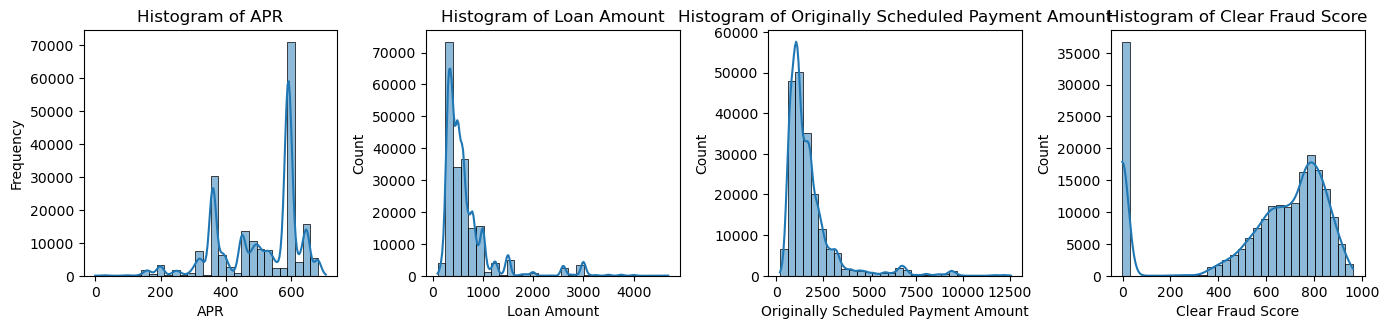

In [2709]:
plt.figure(figsize=(14, 6))

# Create subplots
plt.subplot(2, 4, 1)  
sns.histplot(merged_data['apr'], bins=30, kde=True)
plt.title('Histogram of APR')
plt.xlabel('APR')
plt.ylabel('Frequency')

plt.subplot(2, 4, 2) 
sns.histplot(merged_data['loanAmount'], bins=30, kde=True)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')

plt.subplot(2, 4, 3)  
sns.histplot(merged_data['originallyScheduledPaymentAmount'], bins=30, kde=True)
plt.title('Histogram of Originally Scheduled Payment Amount')
plt.xlabel('Originally Scheduled Payment Amount')

plt.subplot(2, 4, 4)  
sns.histplot(merged_data['clearfraudscore'], bins=30, kde=True)
plt.title('Histogram of Clear Fraud Score')
plt.xlabel('Clear Fraud Score')

plt.tight_layout()
plt.show()

### Findings 

- The APR distribution shows multiple peaks, with most loans clustered around 400-600% APR.
- Most loans are for amounts below 1,000, with very few loans exceeding 4,000.
- Similar to loan amounts, most scheduled payments are below 2,500.
- The clear fraud score is concentrated around the higher end (600-800), indicating that most of the applicants have low fraud risk.

## Distribution of categorical values

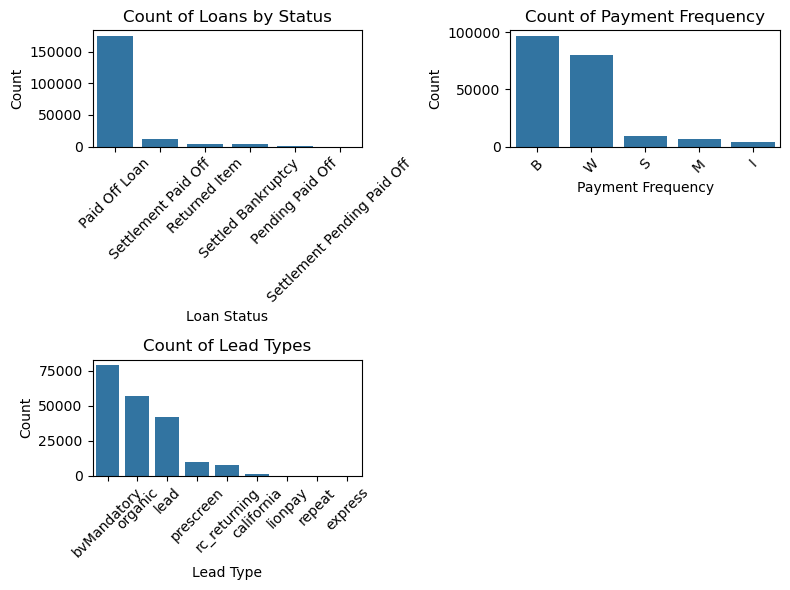

In [2712]:
plt.figure(figsize=(8, 6))

# Bar Plot for loanStatus
plt.subplot(2, 2, 1)  
sns.countplot(data=merged_data, x='loanStatus', order=merged_data['loanStatus'].value_counts().index)
plt.title('Count of Loans by Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar Plot for payFrequency
plt.subplot(2, 2, 2)  
sns.countplot(data=merged_data, x='payFrequency', order=merged_data['payFrequency'].value_counts().index)
plt.title('Count of Payment Frequency')
plt.xlabel('Payment Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar Plot for leadType
plt.subplot(2, 2, 3) 
sns.countplot(data=merged_data, x='leadType', order=merged_data['leadType'].value_counts().index)
plt.title('Count of Lead Types')
plt.xlabel('Lead Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Findings

- The vast majority of loans are marked as "Paid Off Loan," indicating a high success rate in loan repayment.
- The majority of loans have a biweekly payment frequency (indicated by 'B') followed by weekly ('W').
-  The "bvMandatory" and "organic" lead types tops the dataset, suggesting that these methods are the most effective in acquiring customers.

### Bivariate Analysis with Box Plots 

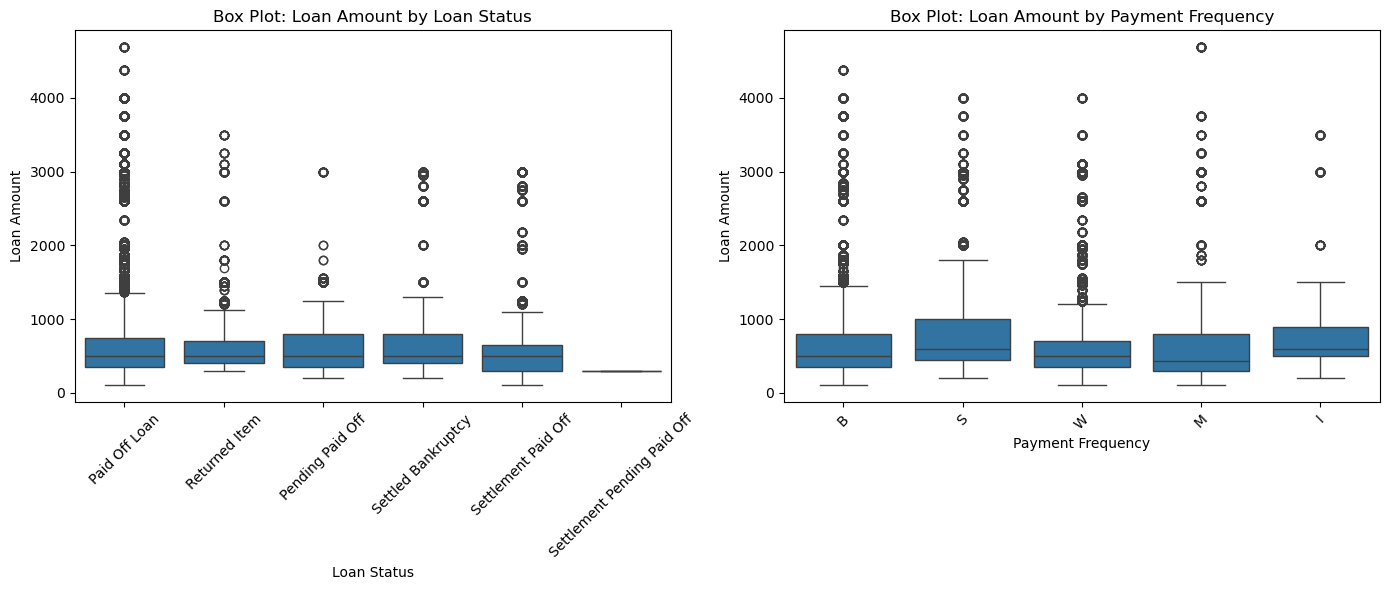

In [2715]:
plt.figure(figsize=(14, 6))

# Box plot for loanAmount by loanStatus
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_data, x='loanStatus', y='loanAmount')
plt.title('Box Plot: Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

# Box plot for originallyScheduledPaymentAmount by loanStatus
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, x='payFrequency', y='loanAmount')
plt.title('Box Plot: Loan Amount by Payment Frequency')
plt.xlabel('Payment Frequency')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Findings

- Paid Off Loans tend to have higher loan amounts compared to other statuses.
- The box plot reveals that biweekly (B) and weekly (W) payment frequencies generally have higher loan amounts than other frequencies.

### Bivariate Analysis 

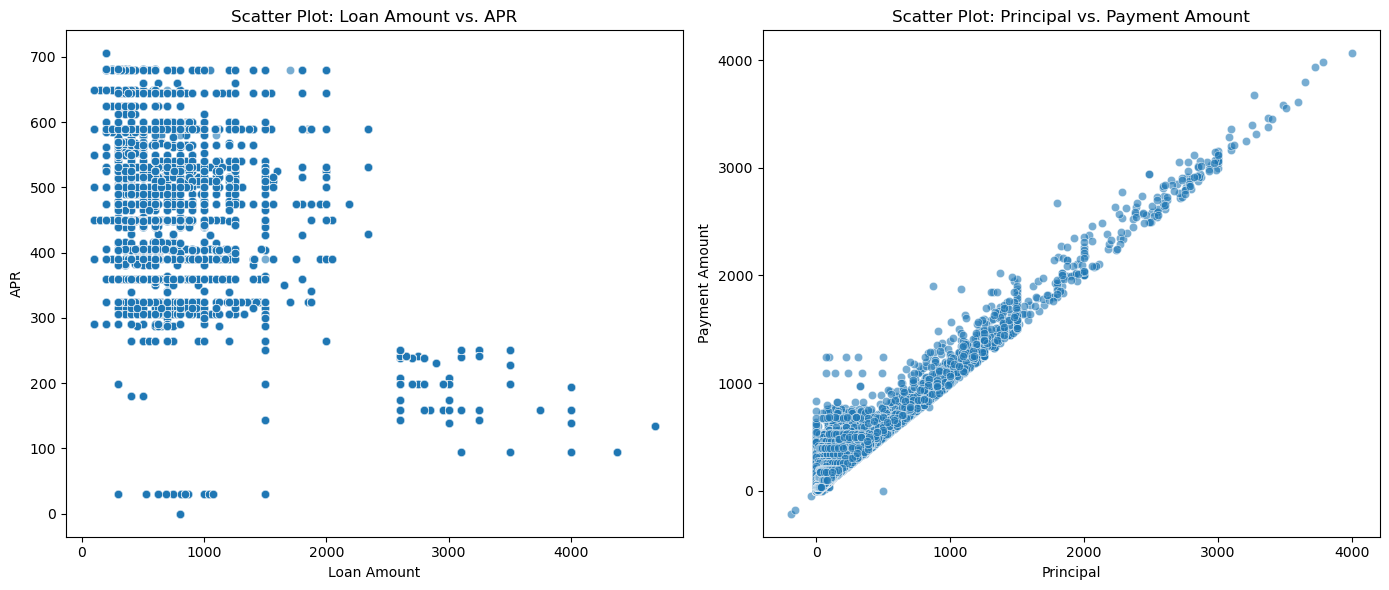

In [2718]:
plt.figure(figsize=(14, 6))

# Scatter plot for Loan Amount vs. APR
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='loanAmount', y='apr', alpha=0.6)
plt.title('Scatter Plot: Loan Amount vs. APR')
plt.xlabel('Loan Amount')
plt.ylabel('APR')

# Scatter plot for Principal vs. Payment Amount
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='principal', y='paymentAmount', alpha=0.6)
plt.title('Scatter Plot: Principal vs. Payment Amount')
plt.xlabel('Principal')
plt.ylabel('Payment Amount')

plt.tight_layout()
plt.show()

### Findings

- The scatter plot shows a varied distribution of APR values across different loan amounts. However, most loans with a lower amount have a wide range of APRs.
- There is a clear positive correlation between principal and payment amount. As the principal increases, the payment amount also tends to increase.

### Correlation Matrix of Merged Data


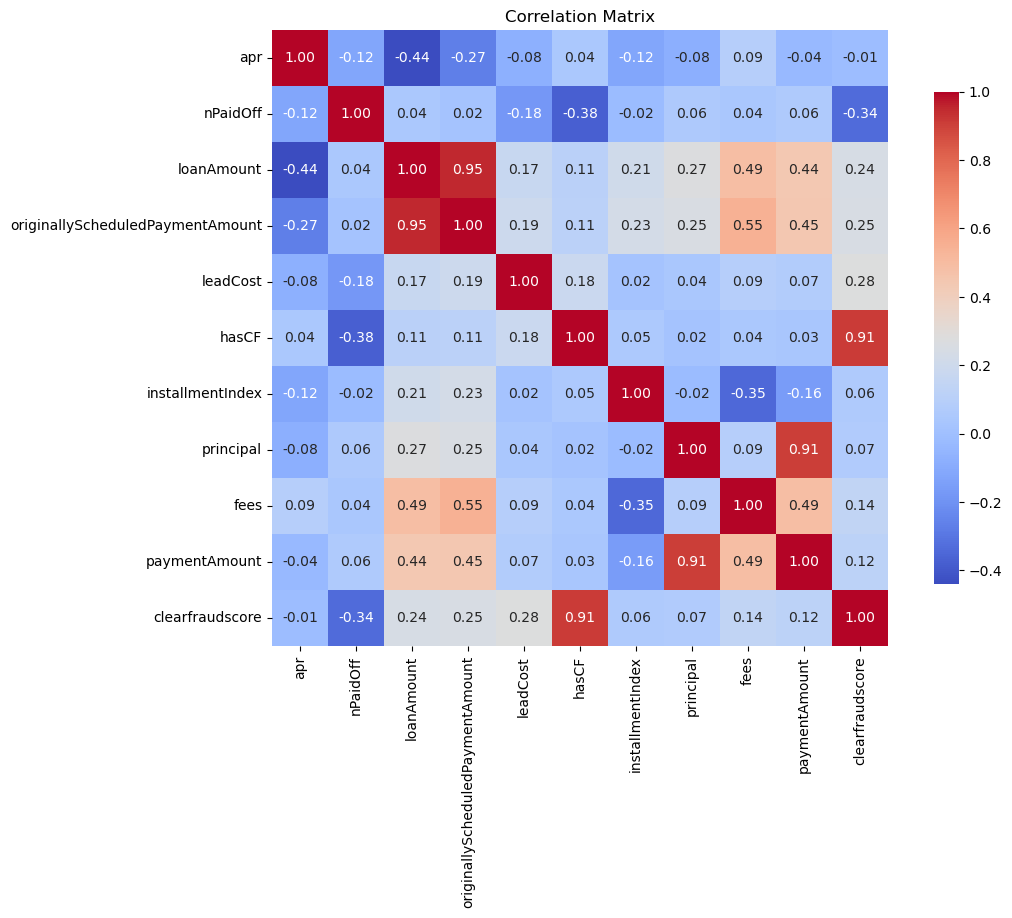

In [2721]:
# Select only numeric columns since correlation matrix only allows for numerical values
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### Findings from the Correlation Matrix 

- Negative Correlation Between APR and Loan Amount (-0.44)- Higher loan amounts are associated with lower APRs.
 

- Strong Positive Correlation Between Loan Amount and Originally Scheduled Payment Amount (0.95)- Larger loan amounts lead to higher scheduled payment amounts.
 
    

- Strong Positive Correlation Between Payment Amount and Principal (0.91) - The total payment amount is closely related to the principal amount borrowed.
 
    

- Moderate Positive Correlation Between Fees and Payment Amount (0.49)- Increased payment amounts are associated with higher fees.



# Loan Risk Prediction Solution

##### My solution for predicting the loan risk of an applicant will be heavily dependent on an applicant's historical payment data. 
##### We will use a binary classification approach where applicants will be either be labeled "High Risk" or "Low Risk" based on their payment behavior.

#### Detailed Approach:

Historical Payment Data Analysis
- We'll look closely into an applicant's payment history, fully focusing specifically on rejected payments for now. In the future, I hope to include late payments, but at this point, I don't have access to each applicant's payment schedule, which limits this projects ability.

- Clarity in what "skipped payments" mean in this context are also needed to understand whether these payments indicate a missed payment or if they were skipped with the lender's permission. 

Binary Classification:
- We’ll establish a binary classification system with two clear labels: "High Risk" and "Low Risk." This makes it easier for lenders to make decisions. High-risk applicants will be those who have rejected payments more than twice, while low-risk applicants will have been great at their payments.

#### Justification
- Historical payment behavior are direct indicators of risk and have a strong correlation with future repayment patterns. This approach aligns with our goal of predicting loan repayment risks.
- The binary classification system provides a simple and clear framework for lenders

### Creating target label "Risk_Flag"

In [2727]:
# create a column to indicate missed payments
# mark payments that are rejected 
merged_data['missed_payment'] = merged_data['paymentStatus'].isin(['Rejected'])

# group by loanId and count missed payments for each loan
missed_payments_count = merged_data.groupby('loanId')['missed_payment'].sum().reset_index()
missed_payments_count.rename(columns={'missed_payment': 'missed_payments_count'}, inplace=True)

# merge missed_payments_count back to the merged_data
merged_data = merged_data.merge(missed_payments_count, on='loanId', how='left')

# flag high-risk applicants based on a threshold
threshold = 3  
# initialize with 'Low Risk'
merged_data['risk_flag'] = 'Low Risk'

for index, row in merged_data.iterrows():
    if row['missed_payments_count'] > threshold:
        merged_data.at[index, 'risk_flag'] = 'High Risk'

# create summary
final_risk_summary = merged_data.groupby('loanId').agg(
    missed_payments_count=('missed_payments_count', 'max'),  # Get the maximum missed payments for the loan
    risk_flag=('risk_flag', 'first') 
).reset_index()
print(final_risk_summary.head(10)) 

          loanId  missed_payments_count  risk_flag
0  LL-I-00000021                      1   Low Risk
1  LL-I-00001902                      0   Low Risk
2  LL-I-00002861                      4  High Risk
3  LL-I-00003372                      0   Low Risk
4  LL-I-00003578                      0   Low Risk
5  LL-I-00003606                      0   Low Risk
6  LL-I-00003732                      0   Low Risk
7  LL-I-00003773                      0   Low Risk
8  LL-I-00004745                      1   Low Risk
9  LL-I-00004937                      0   Low Risk


In [2728]:
# filter for high-risk users only
high_risk_summary = final_risk_summary[final_risk_summary['risk_flag'] == 'High Risk']
print(high_risk_summary.head(10))  

            loanId  missed_payments_count  risk_flag
2    LL-I-00002861                      4  High Risk
61   LL-I-00100708                      4  High Risk
94   LL-I-00198975                      4  High Risk
131  LL-I-00260783                      4  High Risk
181  LL-I-00344987                      4  High Risk
266  LL-I-00600524                      5  High Risk
282  LL-I-00639907                      4  High Risk
333  LL-I-00755886                      4  High Risk
378  LL-I-00810208                      4  High Risk
473  LL-I-00944413                      5  High Risk


# EDA with New Target Label

Now that I have got a reliable target label to be used in predicting loan risk, I will do a quick EDA on the merged dataset along with the new target label.

In [2730]:
# overview of high risk users
high_risk_stats = merged_data[merged_data['loanId'].isin(high_risk_summary['loanId'])].describe()
print(high_risk_stats)

               apr     nPaidOff   loanAmount  \
count  2149.000000  2149.000000  2149.000000   
mean    490.361470     0.244765   725.093067   
std     130.580268     0.619836   682.776002   
min     159.000000     0.000000   200.000000   
25%     360.000000     0.000000   400.000000   
50%     531.250000     0.000000   500.000000   
75%     590.000000     0.000000   800.000000   
max     681.000000     5.000000  3000.000000   

       originallyScheduledPaymentAmount     leadCost        hasCF  \
count                       2149.000000  2149.000000  2149.000000   
mean                        1899.555803    12.693346     0.797580   
std                         1734.623442    32.454759     0.401897   
min                          593.470000     0.000000     0.000000   
25%                          950.350000     0.000000     1.000000   
50%                         1257.820000     3.000000     1.000000   
75%                         2088.960000     6.000000     1.000000   
max            

## Visualize Risk Flag Feature

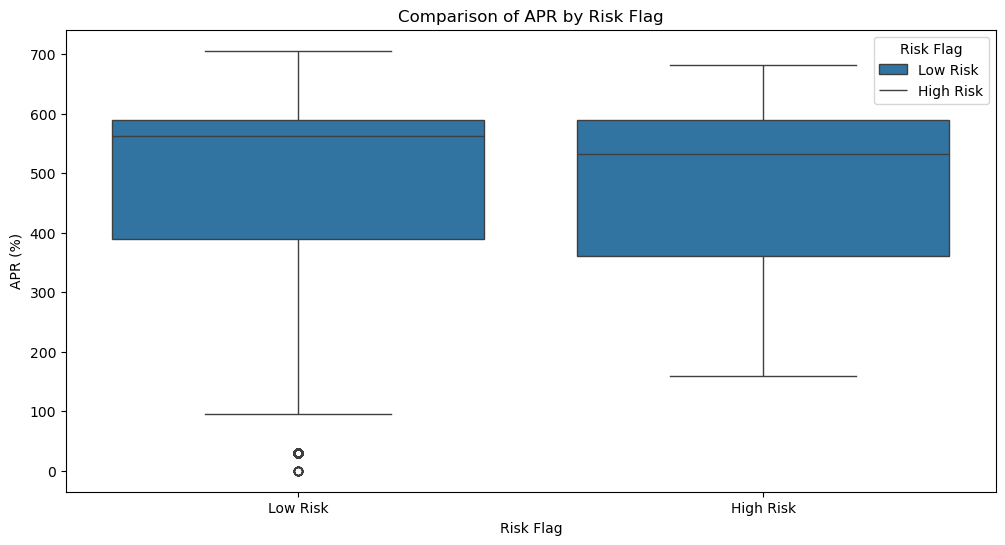

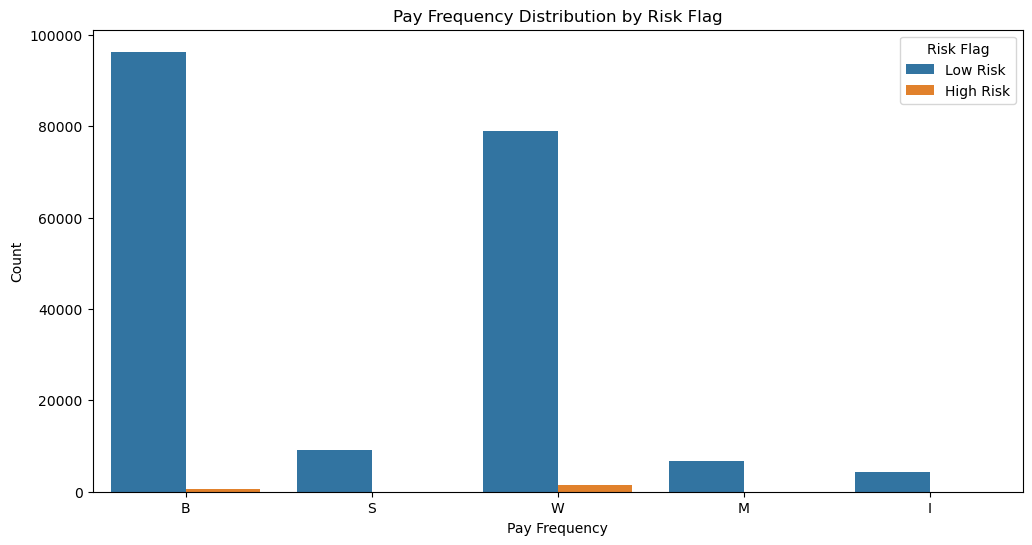

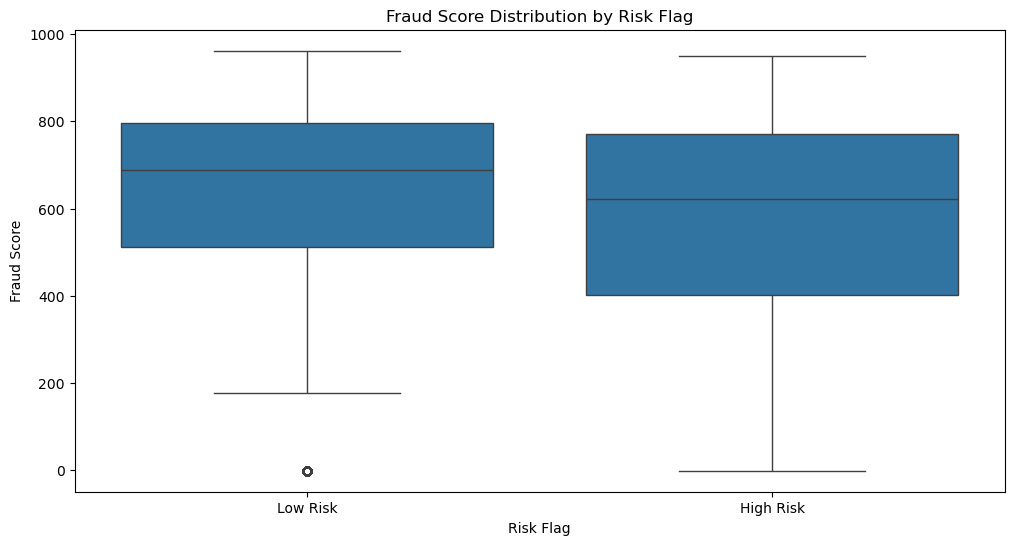

In [2732]:
# APR and Risk Flag
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='risk_flag', y='apr')
plt.title('Comparison of APR by Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('APR (%)')
plt.legend(title='Risk Flag', labels=['Low Risk', 'High Risk'])
plt.show()

# Pat Frequency by Risk Flag
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='payFrequency', hue='risk_flag')
plt.title('Pay Frequency Distribution by Risk Flag')
plt.xlabel('Pay Frequency')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.show()

#Fraud Score and Risk Flag
filtered_data = merged_data[merged_data['clearfraudscore'].notnull()]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='risk_flag', y='clearfraudscore')
plt.title('Fraud Score Distribution by Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Fraud Score')
plt.show()

### New Correlation Matrix 

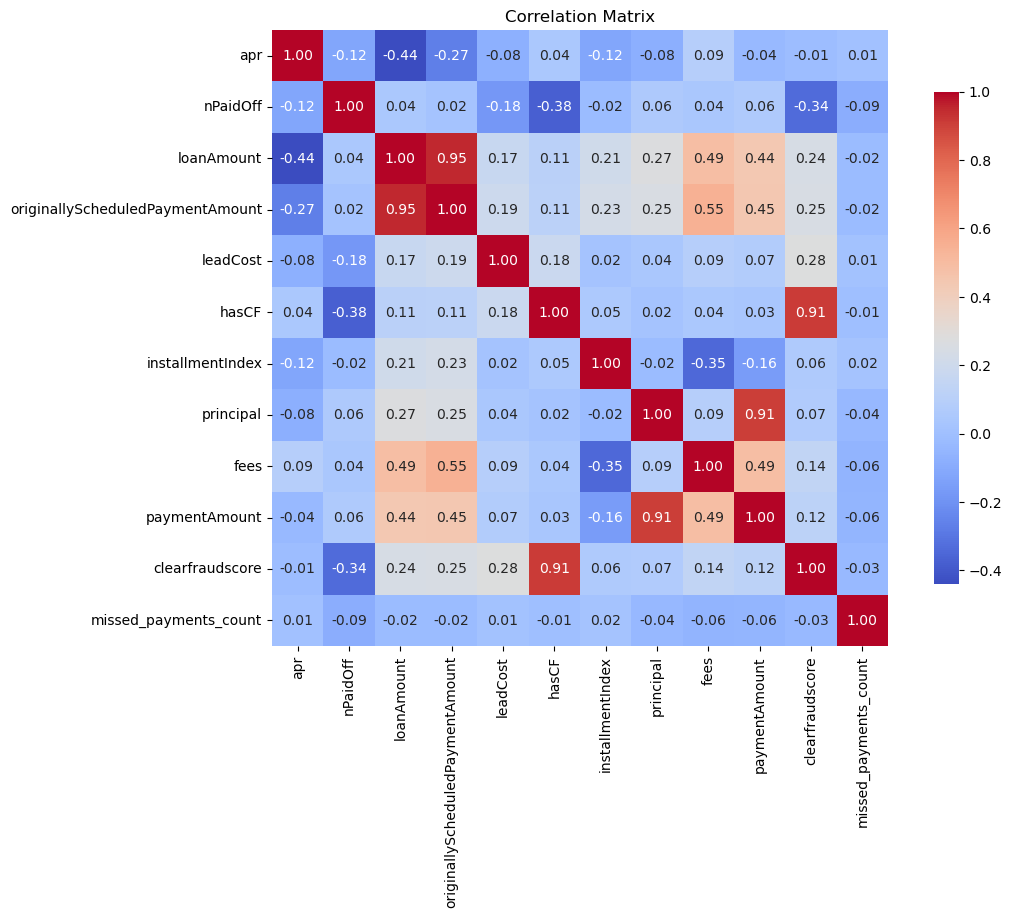

In [2734]:
# Select only numeric columns since correlation matrix only allows for numerical values
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Data Modeling

Chosen Models: K-Nearest Neighbour and Decision Trees

Justifications:
- K-NN: Straigtforward, easy to implement and understand.
- Decision Trees: Less complex than other ML models like Random Forest Classifier and quicker to train.

#### Prepare data 

In [2738]:
# Create the target variable (High Risk = 1, Low Risk = 0)
merged_data['risk_flag'] = merged_data['risk_flag'].map({'High Risk': 1, 'Low Risk': 0})

# Define features and target variable
features = ['apr', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 
            'hasCF', 'installmentIndex', 'principal', 'fees', 
            'paymentAmount', 'clearfraudscore'] 

# Split the dataset into features (X) and target (y)
X = merged_data[features]
y = merged_data['risk_flag']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Justification for choosing 80/20
- The 80/20 train-test split effectively balances training the model with sufficient data while ensuring enough data for evaluation.

#### 1. K Nearest Neighbour (K-NN)

k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39087
           1       0.93      0.80      0.86       449

    accuracy                           1.00     39536
   macro avg       0.96      0.90      0.93     39536
weighted avg       1.00      1.00      1.00     39536

k-NN Accuracy: 1.00


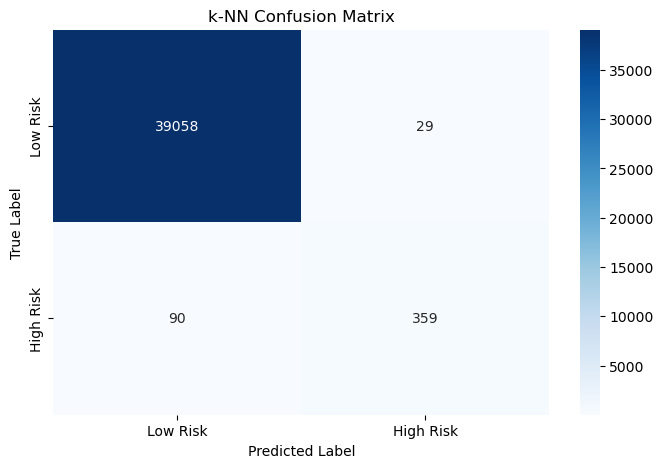

In [2741]:
# Create and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Calculate and print accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

# Calculate the confusion matrix for k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Risk', 'High Risk'], 
            yticklabels=['Low Risk', 'High Risk'])
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 2. Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39087
           1       0.87      0.85      0.86       449

    accuracy                           1.00     39536
   macro avg       0.93      0.92      0.93     39536
weighted avg       1.00      1.00      1.00     39536

Decision Tree Accuracy: 1.00


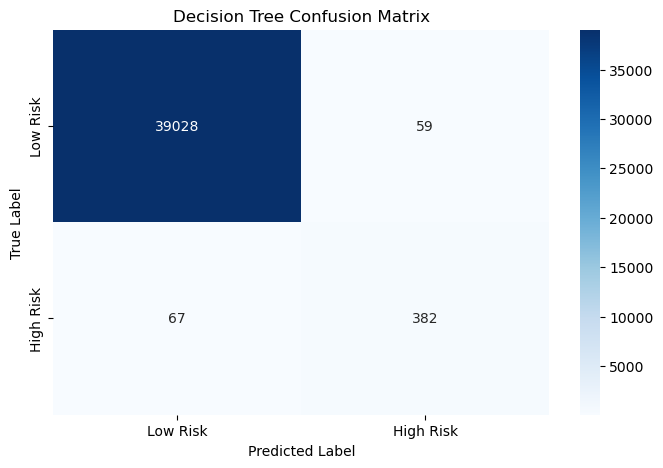

In [2743]:
# Create the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Risk', 'High Risk'], 
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Interpretation of Results
#### k-NN Results:

 - Accuracy: The k-NN model achieved an accuracy of 100%, indicating that it correctly predicted all instances in the test set. This is impressive but may suggest overfitting.
- Confusion Matrix: The confusion matrix shows very few misclassifications (only 29 false positives), which indicates the model performed well in identifying low-risk applicants, but it also highlights the risk of not detecting some high-risk applicants.

#### Decision Tree Results:

- Accuracy: The decision tree also achieved an accuracy of 100%, which also raises concerns about overfitting.
- Confusion Matrix: While the decision tree has a slightly higher false-negative count (67), it effectively identified high-risk applicants with 382 correct predictions.

### Future Considerations When Building Next Models


Considering the things I learned in my machine learning course in university, 
- We should take into account doing Principal Component Analysis (PCA) to the dataset, to reduce the dimensionality of the datas which can help improve model performance by removing noise especially when our findings most likely mean overfitting.
- Use cross-validation to choose the best hyperparameter for each model (number of k for k-NN, max depth among others for decisision trees).
- Plot cross validation result against accuracy
- Explore more models

# Conclusion

In this project, I had developed two loan risk prediction models by analyzing applicants' historical payment data. Utilizing machine learning algorithms like k-NN and decision trees, I effectively classified applicants as "High Risk" or "Low Risk." Although both models achieved perfect scores, this likely indicates overfitting. To address this, I plan to implement techniques like dimensionality reduction techniques (PCA) and hyperparameter tuning. Other than that, a more in depth assessment of high and low-risk users can also be achieved by analyzing late payment behaviors which requires information regarding their payment scheduling.

From a business point of view, predicting the loan risk of existing loans can help MoneyLion take proactive measures against applicants who are at high risk of defaulting. This approach allows MoneyLion to mitigate losses by adjusting payment schedules or amounts. Additionally, insights from the model can enhance decision-making regarding loan approvals.